C:\Users\bikra\AppData\Local\Temp\ipykernel_20104\1309510111.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\bikra\AppData\Local\Temp\ipykernel_20104\1309510111.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Decision Tree Accuracy: 0.80
Tree Depth: 3
Number of Leaves: 8


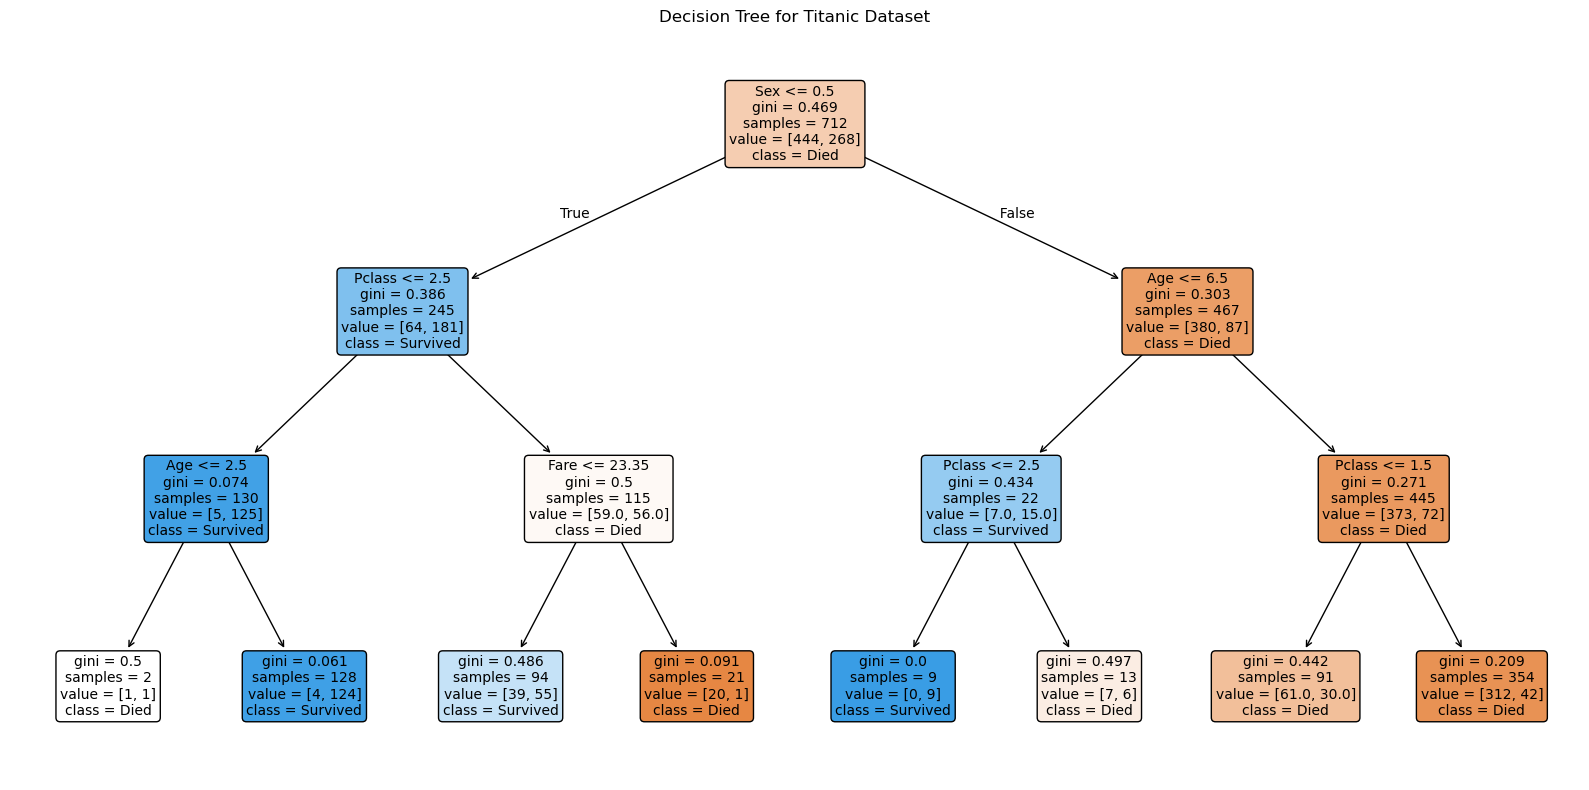

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load Titanic dataset (from seaborn or online CSV)
# You can also use seaborn's version if seaborn is installed
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Select features and target
# We use basic features for this simple tree model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Step 3: Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Step 4: Convert categorical features to numeric
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Split features and labels
X = df[features]
y = df['Survived']

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
depth = clf.get_depth()
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Tree Depth: {depth}")
print(f"Number of Leaves: {clf.get_n_leaves()}")

# Step 9: Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(clf,
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Titanic Dataset")
plt.tight_layout()
# plt.savefig("titanic_decision_tree.png")
plt.show()